In [2]:
#  абстракция: идеальная модель нашей генеральной совокупности 

In [91]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [4]:
mu = 100
sigma = 10

In [5]:
population = np.round(np.random.normal(mu, sigma, 10000), 2) #нормальное распределение из параметров

In [6]:
population #пусть это будет нашей генеральной совокупностью

array([ 99.34,  97.54,  99.45, ..., 111.29,  95.96, 102.15])

C:\Users\Дима\AppData\Local\Temp\ipykernel_12100\4209463519.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(population, kde=False)


<Axes: >

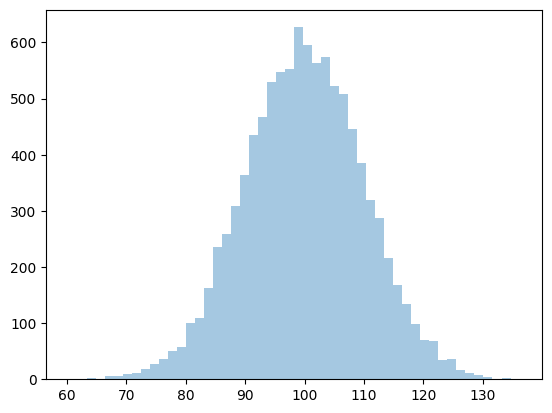

In [7]:
sns.distplot(population, kde=False)

In [45]:
mu = population.mean() #среднее в генеральной совокупности

In [46]:
sigma = population.std() #стандартное отклонение в генеральной совокупности

In [10]:
# пример того что ЦПТ действительно работает

In [11]:
sample_size = 30 # размер нашей выборки

In [12]:
sample = np.random.choice(population, sample_size, False) #наша выборки

In [13]:
sample.mean()

102.30133333333332

In [14]:
sample_means =[] #набор средних в выборках

In [15]:
n = 10000 #колличесвто выборок

In [16]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False) #наша выборки
    sample_means.append(sample.mean())

C:\Users\Дима\AppData\Local\Temp\ipykernel_12100\1429077293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, kde=False) #график средних в выборках


<Axes: >

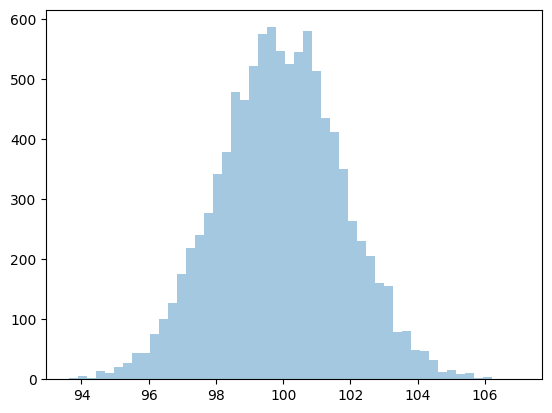

In [17]:
sns.distplot(sample_means, kde=False) #график средних в выборках

In [18]:
np.mean(sample_means) # центропредельная теорема,среднее средних

99.92625476666667

In [19]:
# Правило 3х сигм: 100% наших наблюдений лежит +- 3 сигмы

In [20]:
# Правило 1.96 сигм - 95% всех наблюдений лежит в этом диапазоне

In [21]:
# se = sigma / корень(n)

In [22]:
se = population.std() / sample_size**0.5

In [23]:
se # стандартная ошибка

1.8295382129048756

In [24]:
np.std(sample_means) #стандартная ошибка непосредственно в центропреельной теореме

1.8505405431130268

In [25]:
population.mean() + 1.96* se

103.51281989729355

In [26]:
population.mean() - 1.96* se

96.34103010270644

In [27]:
[96.27, 103.38] # 95% интервал

[96.27, 103.38]

In [28]:
#========================================

In [29]:
# переходим в реальность

In [30]:
sample_real = np.random.choice(population, sample_size, False) #наша выборки

In [31]:
sample_real # в реальность у нас 1 выборка

array([ 88.48, 103.11, 105.27, 118.16,  96.34,  95.75,  99.92,  97.33,
       105.34, 110.59,  95.69, 109.65, 113.04,  88.9 ,  88.83, 113.01,
       103.94, 110.6 ,  93.9 ,  84.44,  81.43, 106.66,  98.2 , 115.42,
        88.41,  93.8 ,  92.99,  94.8 , 105.27, 108.59])

In [32]:
sample_real.mean() #находим среднее

100.262

In [33]:
sample_real.std() #находим стандартное отклонение, ее можно использовать в фомуле, но там уже будет не нормальное распределение,
# а Т распределение

9.598700050874944

In [34]:
# se = sigma / корень(n) 

In [35]:
se = sample_real.std() / sample_size ** 0.5 #находим стандартную ошибку

In [36]:
se

1.7524748468633975

In [37]:
#находим оценненый 95% доверительный интервал

In [38]:
sample_real.mean() + 1.96*se

103.69685069985226

In [39]:
sample_real.mean() - 1.96*se

96.82714930014774

In [40]:
# при многократном повторении 95% из полученных интервалов  наше среднее лежит в генеральной 
# совокупности в интервале от 96 до 103.
# Если бы кто нибудь утверждал, что среднее в ГС 
# выходит за эти рамки(H0), то математически можно было бы
# отклонить его утверждение
# и наоборот, если бы утверждали что она лежит в этом интервале(H0), 
# то это утрверждение можно было бы принять!
# так формулируется две гипотезы: Н0 и Н1, при этом мы принимаем или отклоняем только Н0

In [41]:
# Важно:

# p-уровень значимости не говорит о силе эффекта 
# (напр., пользователи стали пользоваться приложением меньше в 3 или 1.1 раза)

# Если получили уровень значимости выше порога – это не значит, что нулевая гипотеза верна. 
# Просто такой уровень значимости не позволяет нам её отклонить.

In [42]:
# ===============================================

#### Z- распределение для средних в множетсвенной выборке 
Это идеальная математическая модель, к которому мы стремимся, потому что нам невозможно узнать среднее в генеральной совокупности и ее стандартное отклонение 

In [93]:
sample_size = 31 #объем нашей выборки

In [94]:
se = population.std() / sample_size**0.5  #стандартная ошибка среднего

In [95]:
z_scores = [] #накопитель значений среднего
n = 10000 # колличество выборок

In [96]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False) #наша выборки
    sample_mean = sample.mean() #находим среднее в выборке
    
    z_score = (sample_mean - mu) / se  #распределение среднего в выборке (в этом случае нам известно среднее в ГС и ее СтО)
    z_scores.append(z_score)

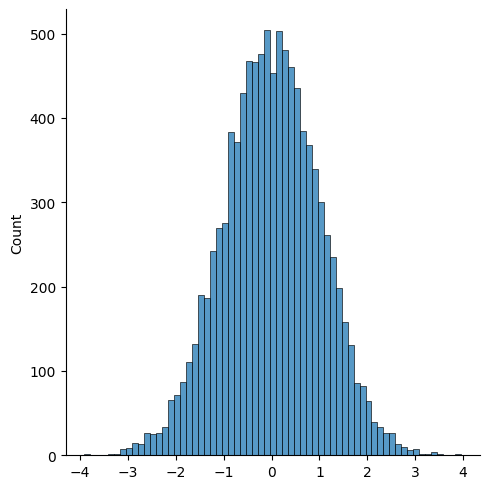

In [97]:
sns.displot(z_scores, kde=False)

In [98]:
# t - распределение

In [99]:
t_scores = []
n = 10000

In [100]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False) #наша выборки
    sample_mean = sample.mean()
    sample_std = sample.std() #находим стандартное отклонение в выборке
    
    se_ = sample_std / sample_size ** 0.5 #считаем стандартную ошибку среднего 
    t_score = (sample_mean - mu) / se_  #находим новое значение в распределение
    
    t_scores.append(t_score)

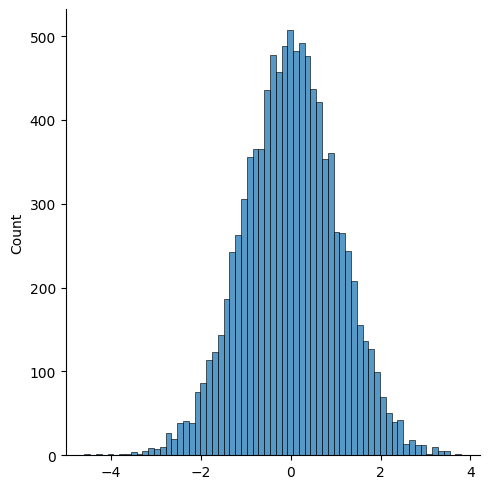

In [101]:
sns.displot(t_scores, kde=False)

In [102]:
# число степеней свободы для Т распределения
df = sample_size - 1
df

30

#### Распределение Стьюдента (Т-распределение)
Чем больше степеней свободы и чем больше наблюдений, тем всё больше распределение становится похожим на нормальное

### Дисперсионный анализ
#### ANOVA на практике

In [118]:
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
post_likes = pd.read_csv('post_likes.csv')

In [121]:
post_likes.head()

,id,button,likes
0,S001,red,160
1,S002,red,150
2,S003,red,150
3,S004,red,150
4,S005,red,187


#### Этап 1, описателная статистика
Рисуем графики

<Axes: xlabel='button', ylabel='likes'>

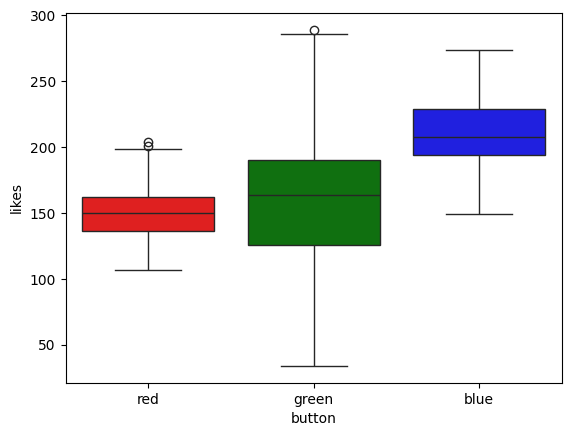

In [130]:
#через боксплот
sns.boxplot(x='button', y='likes', data=post_likes, hue='button', palette=['r','g','b'] ) 

<Axes: xlabel='button', ylabel='likes'>

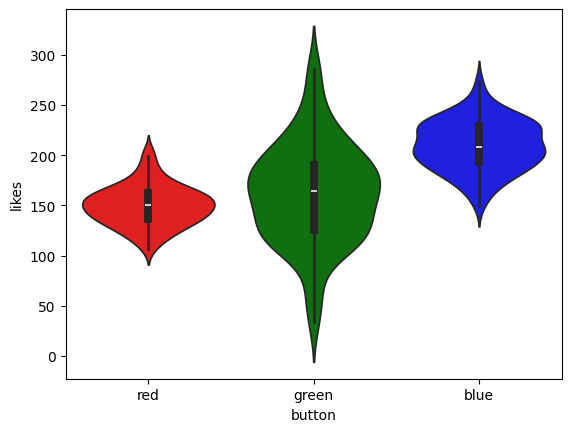

In [131]:
#скрипичный график - более наглядно, есть наглядное распределение
sns.violinplot(x='button', y='likes', data=post_likes, hue='button', palette=['r','g','b'] )

#### Три способа посчитать однофакторный ANOVA:

In [133]:
# через scipy
red = post_likes.query('button=="red"').likes
green = post_likes.query('button=="green"').likes
blue = post_likes.query('button=="blue"').likes

In [134]:
ss.f_oneway(red,green,blue)

F_onewayResult(statistic=85.99631112614011, pvalue=3.437004581021769e-30)

В дисперсионном анализе p-value < 0.05 -- между группами статистически есть различия, но если бы групп было намного больше в f_oneway:
1. Не удобно выделять каждую группу;
2. Не понятно между какими группами есть различия;

In [135]:
#через statsmodels
model = smf.ols(formula = "likes ~ C(button)", data=post_likes).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(button),2.0,201960.286667,100980.143333,85.996311,3.437005e-30
Residual,297.0,348748.710000,1174.238081,NaN,NaN


Через statsmodels более удобный спрособ:
1. likes ~ C(button) какие значения ~ группируем по button --нам не нужно явно выделять каждую группу;
2. Есть больше данных которые используются в статистике;

Но:
- Слишком много промежуточных функций, чтобы получить конечный результат;

In [136]:
#через pingouin
pg.anova(data=post_likes, dv='likes', between='button')

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,297,85.996311,3.437005e-30,0.366728


Через pingouin более удобный спрособ:
1. Удобная формула в 1 строку;
2. Наличие достаточной информации, которая используется в статистике;

Построим график среднего с доверительными интервалами

<Axes: xlabel='button', ylabel='likes'>

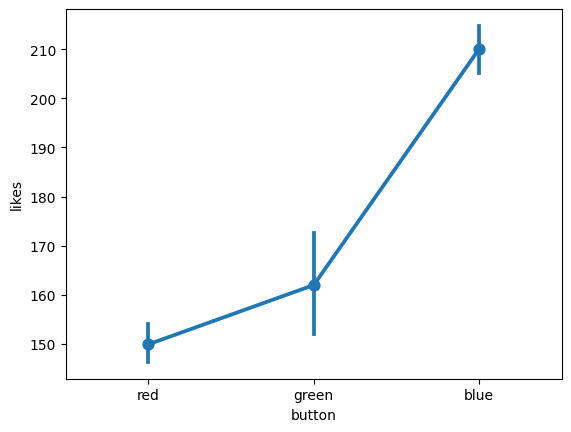

In [137]:
sns.pointplot(x='button', y='likes', data=post_likes)

По графику можно сделать следующие выводы:
1. Однозначное различие кнопки blue;
2. Кнопки red and green скорее всего не различаются, по ним необходимо провести доп. стат. тесты.

#### Тестируем нормальность 

In [138]:
#Через scipy, shapiro - не очень хорошо реагирует на выборки очень большого размера, 
# если выборки слишком большие, то он реагирует даже на самые мелкие отклонения от нормальности
print(ss.shapiro(red))
print(ss.shapiro(blue))
print(ss.shapiro(green))

ShapiroResult(statistic=0.988104522228241, pvalue=0.515945315361023)
ShapiroResult(statistic=0.9937934279441833, pvalue=0.9309807419776917)
ShapiroResult(statistic=0.988717794418335, pvalue=0.5625351667404175)


In [139]:
#Через normaltest - более нормально реагирует на выборки очень большого размера
print(ss.normaltest(red))
print(ss.normaltest(blue))
print(ss.normaltest(green))

NormaltestResult(statistic=1.834358590753997, pvalue=0.3996447324611219)
NormaltestResult(statistic=0.4606964500747045, pvalue=0.7942569741771747)
NormaltestResult(statistic=0.6727062715909409, pvalue=0.7143707913703767)


In [140]:
#Через pingouin
pg.normality(data=post_likes, dv='likes', group='button', method='normaltest')

,W,pval,normal
button,,,
red,1.834359,0.399645,True
green,0.672706,0.714371,True
blue,0.460696,0.794257,True


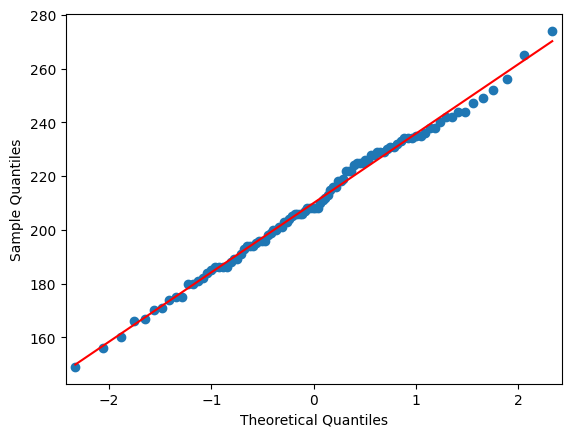

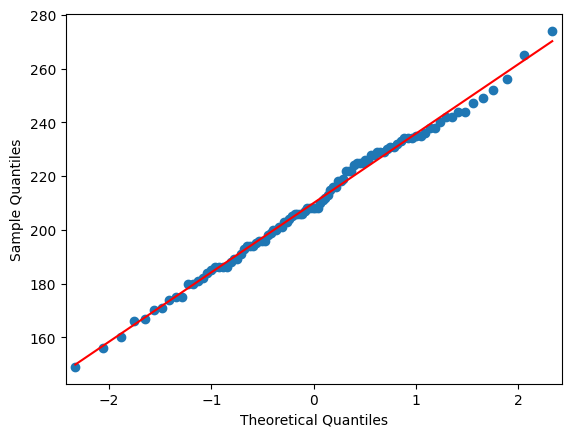

In [141]:
#можно проверить с помощью графиков
#например проверим 1 группу
sm.qqplot(blue, line='r')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

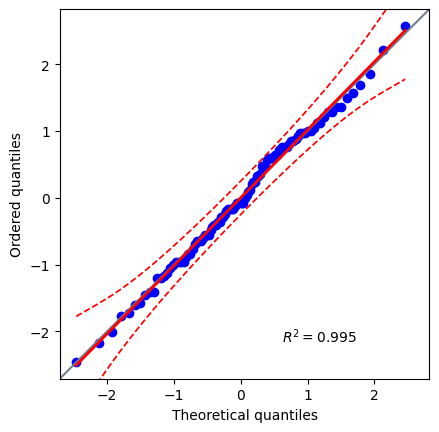

In [142]:
#график в pingouin
pg.qqplot(blue)

В pingouin:
1. Более наглядно;
2. Есть доверительный интервал;

#### Тестируем различие в дисперсиях

In [143]:
#через scipy -- тест ЛЕВЕНА
ss.levene(red,green,blue)

LeveneResult(statistic=35.214282435572876, pvalue=1.8886636651083753e-14)

In [144]:
#через pingouin -- проверка на гомоскедастичность (или гетеро...)
pg.homoscedasticity(data=post_likes, dv='likes', group='button')

,W,pval,equal_var
levene,35.214282,1.888664e-14,False


По результатам тестов дисперисии разные p-value < 0.05
- Что в этом случае нам делать?, необходимы поправки на различие в дисперсиях

Используем поправки Уэлча

In [146]:
#ANOVA Уэлча в pingouin
pg.welch_anova(data=post_likes, dv='likes', between='button')

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,182.958104,177.856578,1.255660e-43,0.366728


При использовании поправок на разность дисперсий, тесты показывают результат еще более высокого F значения (было 85.99 - -стало 177.85):
- Различия между группами есть, с поправками на дисперсию они еще более выраженные;

### Проблема множественного сравнения

In [147]:
from scipy.special import comb

Почему мы используем ANOVA вместо t-теста?
- Разбор:

In [163]:
n = comb(3, 2) #биноминальный коэффициент - сколько пар в 3 различных условиях
print(f"Колличество групп = {n}")
print(f'p-value = {1 - 0.95**n}') 

Колличество групп = 3.0
p-value = 0.1426250000000001


In [164]:
n = comb(5, 2) #биноминальный коэффициент - сколько пар в 3 различных условиях
print(f"Колличество групп = {n}")
print(f'p-value = {1 - 0.95**n}') 

Колличество групп = 10.0
p-value = 0.4012630607616213


Чем больше групп, тем больше p-value при множественном сравнении == тем сильнее наш шанс допустить ошибку 1 рода.

Если нашли различия, то используем множественное сравнение. При этом нам необходимо использовать поправки в тестах, так как мы уже выяснили, что при множественном сравнени увеличивается ошибка 1 рода.

In [166]:
#Попарные сравнения без поправки
pg.pairwise_tests(data=post_likes, dv='likes', between='button')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,1.583,0.315609


In [167]:
#попарное сравнение с поправкой Банферони
pg.pairwise_tests(data=post_likes, dv='likes', between='button', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,7.685599e-15,bonf,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,2.385699e-45,bonf,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,7.857004e-02,bonf,1.583,0.315609


In [168]:
#попарное сравнение с тестом Тьюки
pg.pairwise_tukey(data=post_likes, dv='likes', between='button')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,blue,green,210.03,162.02,48.01,4.846108,9.906919,1.143530e-14,1.210357
1,blue,red,210.03,149.96,60.07,4.846108,12.395514,1.143530e-14,2.644301
2,green,red,162.02,149.96,12.06,4.846108,2.488595,3.557351e-02,0.315609


In [170]:
#попарное сравнение с тестом Геймса-Хоувела - при неравнестве дисперсий, НАШ СЛУЧАЙ!
pg.pairwise_gameshowell(data=post_likes, dv='likes', between='button')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,blue,green,210.03,162.02,48.01,5.588343,8.591097,145.583529,2.242651e-14,1.210357
1,blue,red,210.03,149.96,60.07,3.200454,18.769214,188.902921,0.000000e+00,2.644301
2,green,red,162.02,149.96,12.06,5.383475,2.240189,129.889834,6.830241e-02,0.315609


In [171]:
#реализация через стат моделс
#попарное сравнение с тестом Тьюки
#через стат моделс нет теста Геймса-Хоувела
#так что используем pingouin
pairwise_tukeyhsd(post_likes.likes, post_likes.button).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
blue,green,-48.01,0.0,-59.4251,-36.5949,True
blue,red,-60.07,0.0,-71.4851,-48.6549,True
green,red,-12.06,0.0356,-23.4751,-0.6449,True


In [175]:
MultiComparison(post_likes.likes, post_likes.button).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
blue,green,-48.01,0.0,-59.4251,-36.5949,True
blue,red,-60.07,0.0,-71.4851,-48.6549,True
green,red,-12.06,0.0356,-23.4751,-0.6449,True


### Mногофакторный дисперсионный анализ
#### Многофакторный ANOVA

Многофакторный дисперсионный анализ:
проверяет действие несколких факторов на исследуемый нами признак:
1. фактор нашего экспериментального воздействия(колличество лайков, просмотров, реакций, цвет лайка);
2. дополнительный фактор: возрастная группа, мужчины женщины и тд(разные группы в группе, форма лайка)


In [177]:
#загрузим многофакторный данные 
ads_clicks = pd.read_csv('ads_clicks.csv')

In [178]:
ads_clicks.head()

,id,ads,age_group,clicks
0,S001,classic,18-27,40
1,S002,classic,18-27,22
2,S003,classic,18-27,41
3,S004,classic,18-27,35
4,S005,classic,18-27,39


In [180]:
#многофакторный анализ через стат моделс - только главные эффекты
model_main = smf.ols("clicks ~ C(ads)+C(age_group)", data=ads_clicks).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,68.810244,7.245176e-16
C(age_group),2.0,400495.163333,200247.581667,408.450696,1.950084e-112
Residual,596.0,292195.753333,490.261331,NaN,NaN


По результатам теста:
1. Есть эффект рекламной компании;
2. Есть эффект возрастной группы;

Мы учли только главные эффекты, связь между 1 и 2 фактором здесь не учитываем;

<Axes: xlabel='ads', ylabel='clicks'>

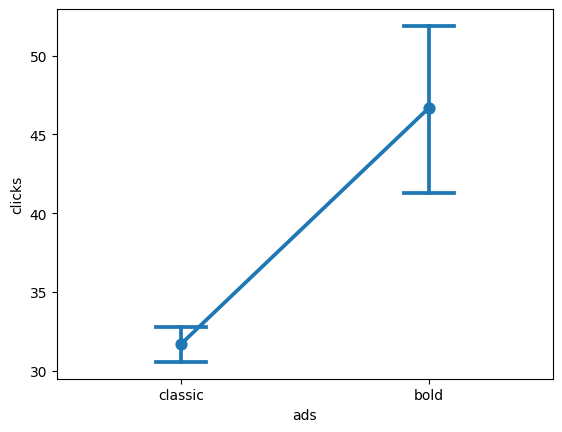

In [181]:
#Первый фактор
sns.pointplot(x='ads', y='clicks', data=ads_clicks, capsize=0.2)

По графику: реклама bold and classic различаются, но необходимо еще учитывать фактор возраста

<Axes: xlabel='age_group', ylabel='clicks'>

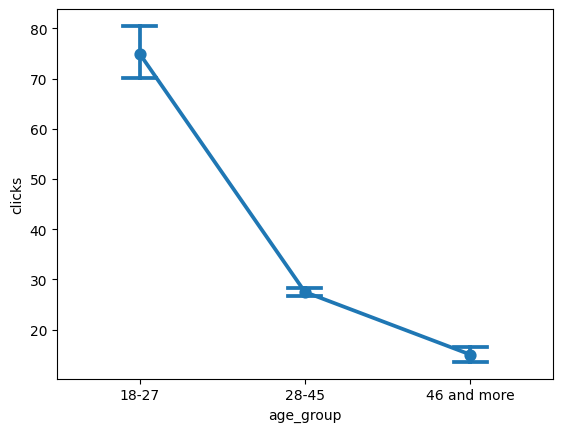

In [183]:
#Второй фактор
sns.pointplot(x='age_group', y='clicks', data=ads_clicks, capsize=0.2)

По графику: более молодые группы кликают чаще.

НО сейчас у нас графики не взаимосвязанны и !многофакторный анализ через стат моделс - мы рассмотрели только главные эффекты === как будто они не связанны === будто бы всегда эпатажная реклама будет собирать больше просмотров и в этой рекламе 18-27 возрастная группа самая кликабельная

##### Проверяем взаимодеqствие:

In [184]:
#многофакторный анализ через стат моделс - главные эффекты + их взаимодействие
model_main = smf.ols("clicks ~ C(ads)+C(age_group) + C(ads):C(age_group)", data=ads_clicks).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,336.722432,6.446773e-60
C(age_group),2.0,400495.163333,200247.581667,1998.750536,1.636934e-264
C(ads):C(age_group),2.0,232685.043333,116342.521667,1161.260853,5.618312e-206
Residual,594.0,59510.710000,100.186380,NaN,NaN


<Axes: xlabel='ads', ylabel='clicks'>

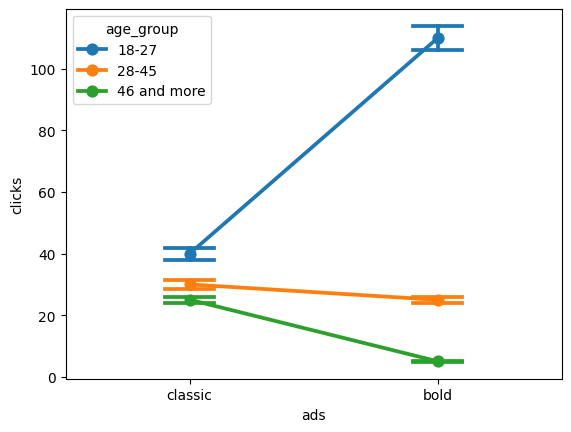

In [185]:
sns.pointplot(x='ads', y='clicks', hue='age_group', data=ads_clicks, capsize=0.2)

При проверке взамодействия факторов в стат моделс получили стат значимые результаты == взаимодействие есть и оно значимо;

При проверке взаимодействия факторов на графике можно визуально увидеть , как разные возрастные группы отреагировали на новую рекламу;


In [186]:
#сделаем то же самое в pingouin
#проверяет влияние факторов и их взаимодействие(n2 показывает влияние только этого фактора без учета других факторов)
pg.anova(data=ads_clicks, dv='clicks', between=['ads','age_group'])

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [187]:
#размер эффекта(n2 показывает влияние факторая с учетом других факторов общую дисперсию)
pg.anova(data=ads_clicks, dv='clicks', between=['ads','age_group'], effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.046440
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.551323
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.320315
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [189]:
pg.anova(data=ads_clicks, dv='clicks', between=['ads','age_group'], ss_type=3)

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


В ss_type показывает как считается сумма квадратов эффектов:
1. ss_type=1 считается попорялку -- 1 фактор, 2 фактор, взаимодействие;
2. ss_type=2 считает главные факторы одновременно и потом взаимодействие -- считаем, если нам вожны именно главные факторы
3. ss_type=3 сичтает все одновременно --считаем, если нам важно взаимодействие

Не рекомендуется использовать ss_type=1, потому что она зависит от того в каком порядке мы вводим факторы.